In [1]:
# ISLR material, Original R to Python adaptation by Jordi Warmenhoven
# Subsequent Adaptation from http://www.science.smith.edu/~jcrouser/SDS293/
# Further simplifications and adaptions done above those.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [3]:
Auto = pd.read_csv('Auto.csv')

In [4]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
Auto.shape

(397, 9)

In [7]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
Auto["origin"] = Auto["origin"].astype('category')

In [10]:
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.0,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,3.0,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,248.0,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,NaN,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,NaN,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,NaN,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,NaN,NaN


In [11]:
np.mean(Auto['displacement'])

193.53274559193954

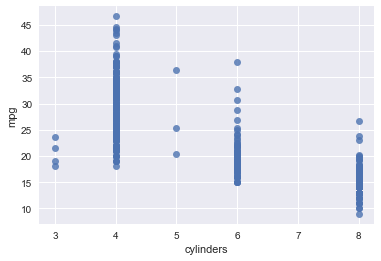

In [12]:
sns.regplot(x='cylinders', y='mpg', data=Auto, fit_reg=False)
plt.show()

In [13]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model: ``order``, ``logistic``, ``lowess``, ``robust``, and
    ``logx``. See the parameter docs for more information on these options.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-for

In [14]:
Auto["cylinders"] = Auto["cylinders"].astype('category')

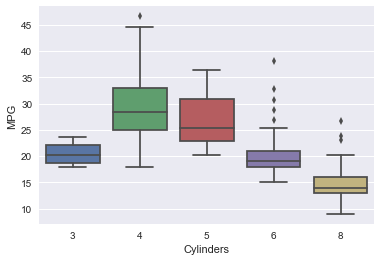

In [15]:
fig = sns.boxplot(x='cylinders', y='mpg', data=Auto)
fig.set_xlabel('Cylinders')
fig.set_ylabel('MPG')
plt.show()

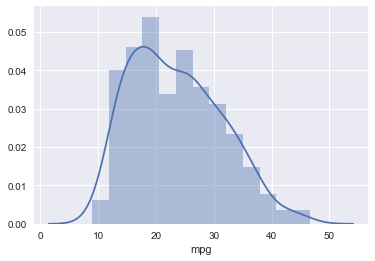

In [16]:
sns.distplot(Auto['mpg'])
plt.show()

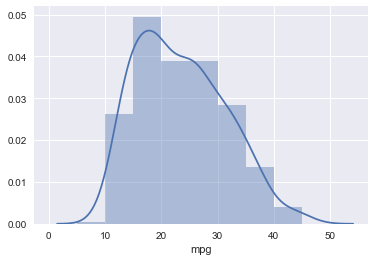

In [17]:
sns.distplot(Auto['mpg'], bins=range(0,50,5))
plt.show()

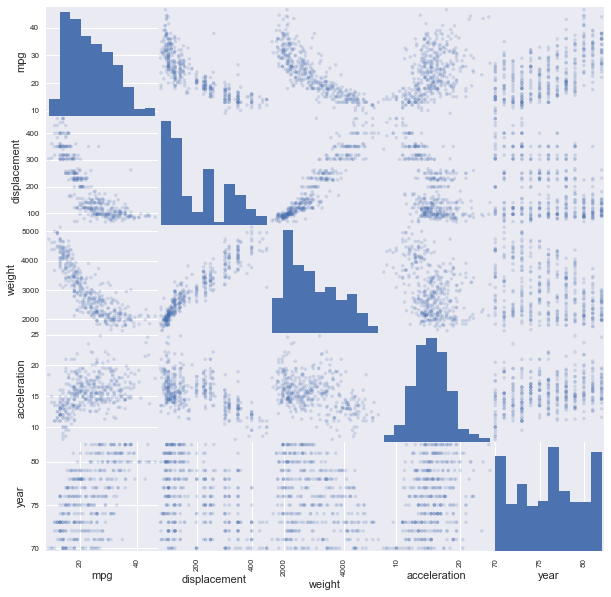

In [18]:
pd.plotting.scatter_matrix(Auto, alpha=0.2, figsize=(10, 10))
plt.show()

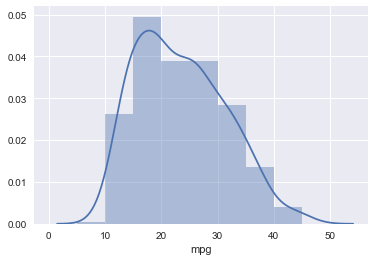

In [19]:
x = sns.distplot(Auto['mpg'], bins=range(0,50,5))
x.figure.savefig('histogram.png')